# Unsupervised Learning Project - Customer Segmentation

## Problem Description

In this project, I will perform customer segmentation using unsupervised learning techniques on the "Mall Customers" dataset. The dataset contains information about customers' age, gender, annual income, and spending score. My goal is to group customers into distinct clusters based on their spending habits and income, which could help the mall tailor its marketing strategies to different customer segments.

## Step 1: Load and Inspect the Data

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = '/Users/sach/Downloads/Mall Customers.csv'
df = pd.read_csv(data)

# Display the first few rows of the dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 2: Data Inspection and Summary

In [2]:

# Check the shape of the dataset
df.shape

# Display summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Step 3: Visualizing the Data

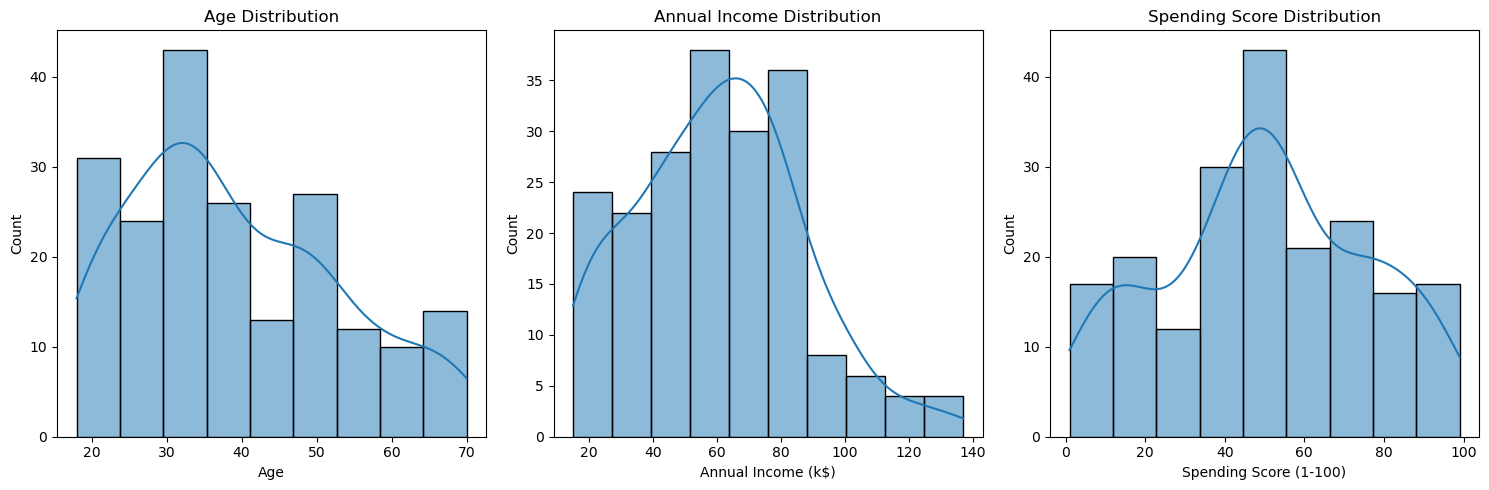

In [3]:

# Visualize the distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


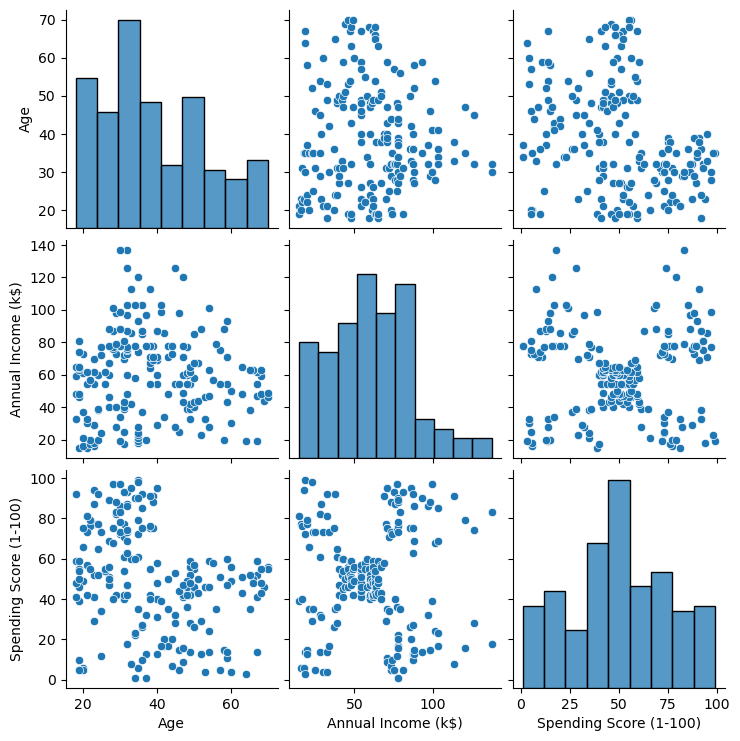

In [4]:

# Pairplot to visualize the relationships between variables
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='hist')
plt.show()


## Step 4: Correlation Analysis

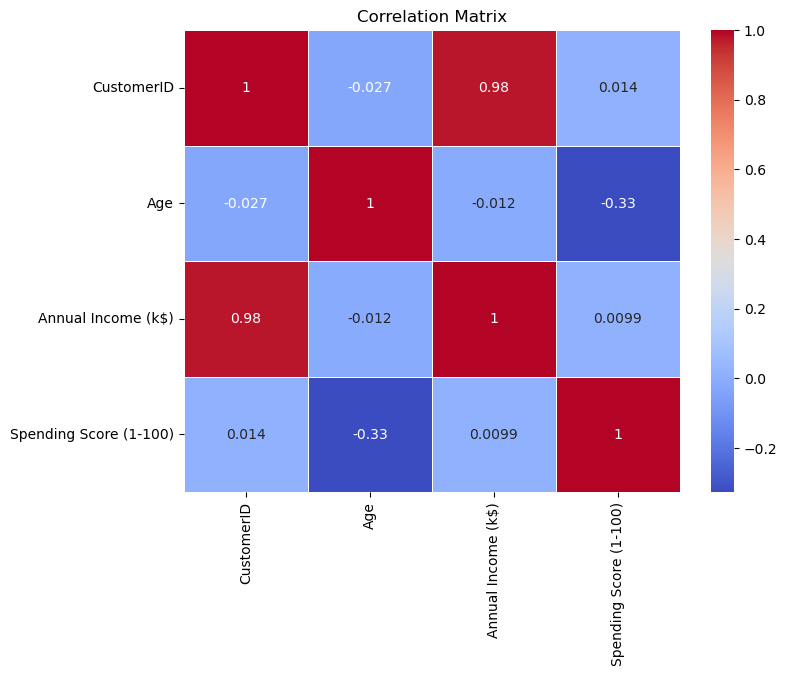

In [5]:

# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Step 5: Feature Engineering and Preprocessing

In [6]:

# Select the features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
scaled_df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step 6: Determining the Optimal Number of Clusters

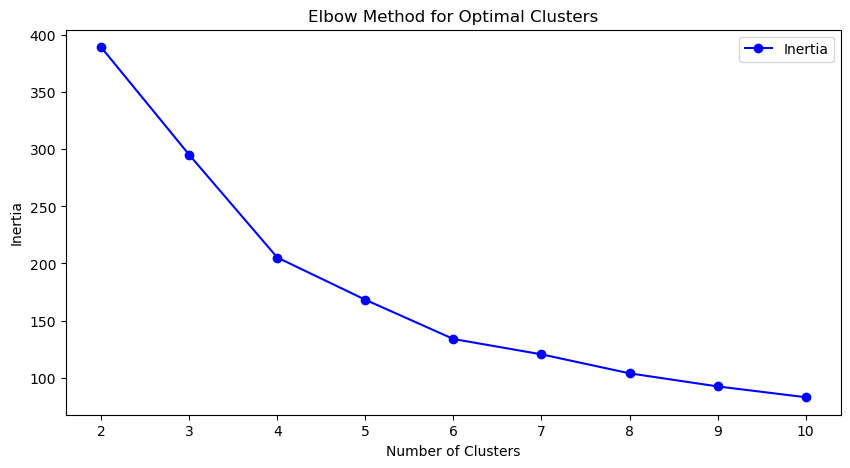

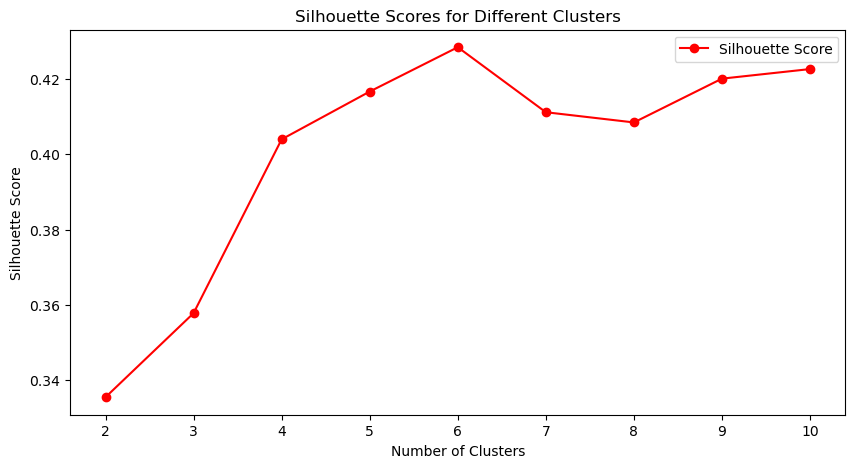

In [7]:

# Determine the optimal number of clusters using the Elbow Method and Silhouette Scores
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.legend()
plt.show()

# Plot the Silhouette Score graph
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clusters')
plt.legend()
plt.show()


## Step 7: Applying K-Means Clustering

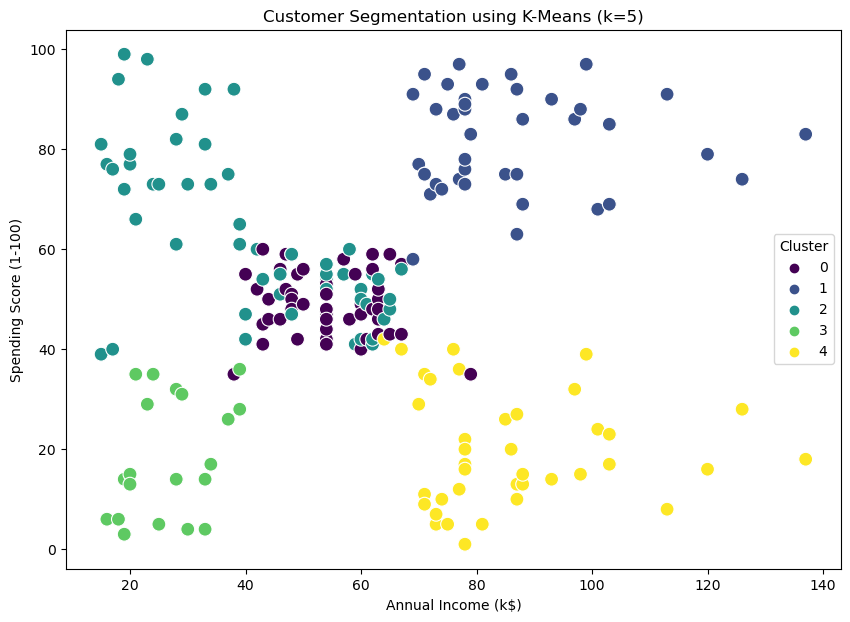

In [8]:

# Apply K-Means with the chosen number of clusters
optimal_k = 5  # Assume from the Elbow and Silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title(f'Customer Segmentation using K-Means (k={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


## Step 8: Analyzing the Clusters

In [9]:

# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()

# Add count of customers per cluster
cluster_summary['Count'] = df['Cluster'].value_counts()

cluster_summary


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,,,
0,83.872340,55.638298,54.382979,48.851064,47
1,161.025000,32.875000,86.100000,81.525000,40
2,55.648148,25.185185,41.092593,62.240741,54
3,24.100000,46.250000,26.750000,18.350000,20
4,159.743590,39.871795,86.102564,19.358974,39


## Conclusion

The clustering analysis revealed five distinct customer segments within the dataset.

Cluster 0 - older customers with moderate income and average spending scores

Cluster 1 - young customers with high income and high spending scores

Cluster 2 - young customers with lower income but relatively higher spending scores

Cluster 3 - middle-aged customers with low income and low spending scores

Cluster 4 - middle-aged customers with high income but low spending scores

The customer segmentation achieved through K-Means clustering offers valuable insights for targeted marketing strategies. By understanding the characteristics of each cluster, the mall can tailor its promotions, product offerings, and customer engagement strategies to better meet the needs and preferences of each customer segment. For instance, high-spending clusters (like Cluster 1) could be targeted with premium products and exclusive offers, while price-sensitive clusters (like Cluster 3) might respond better to discounts and loyalty programs. Overall, the segmentation provides a data-driven approach to enhancing customer satisfaction and maximizing revenue.